/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
[nltk_data] Downloading package brown to /home/jupyter/nltk_data...
[nltk_data]   Package brown is already up-to-date!


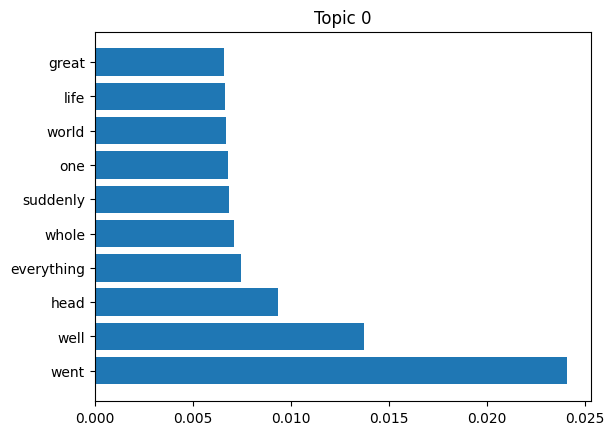

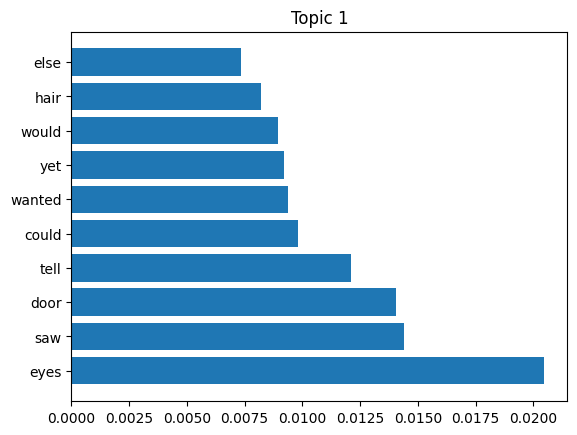

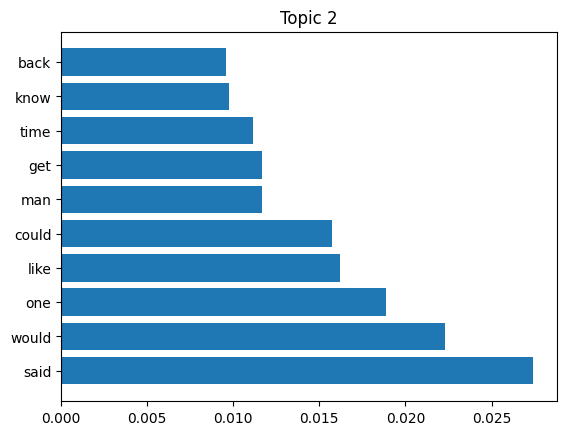

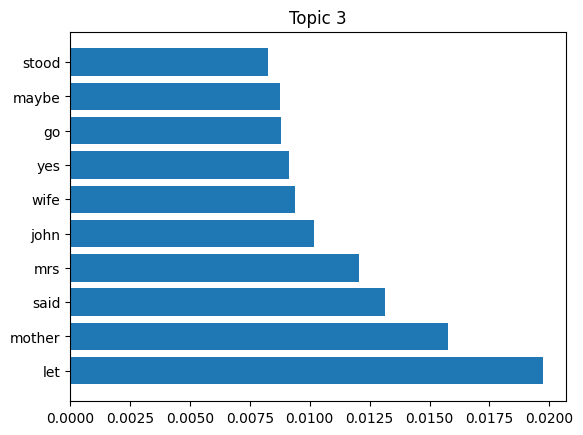

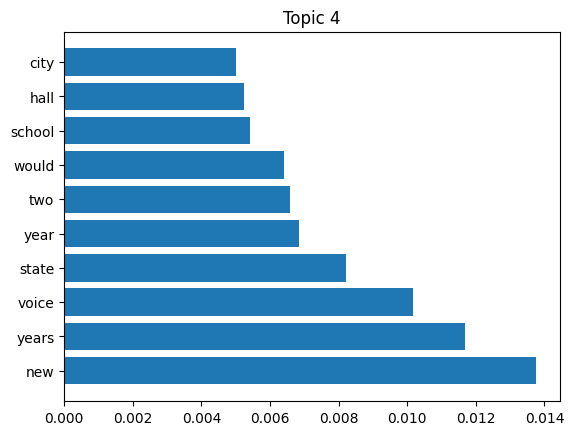

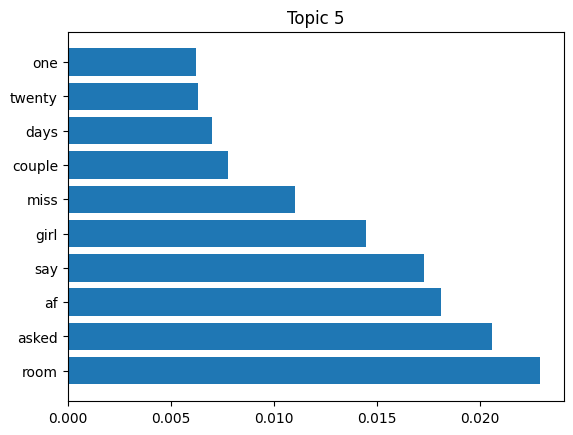

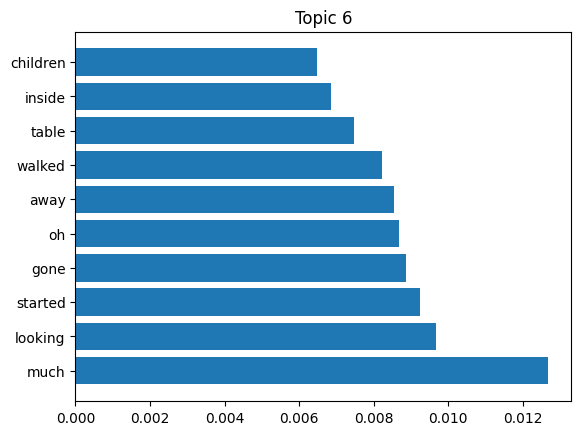

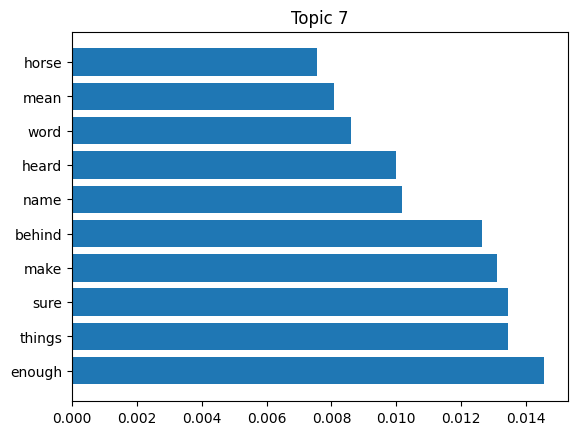

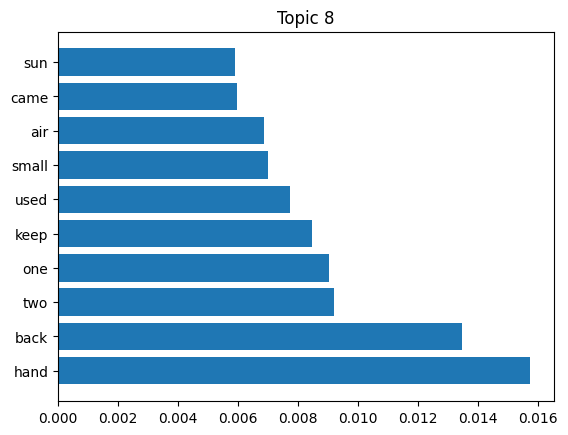

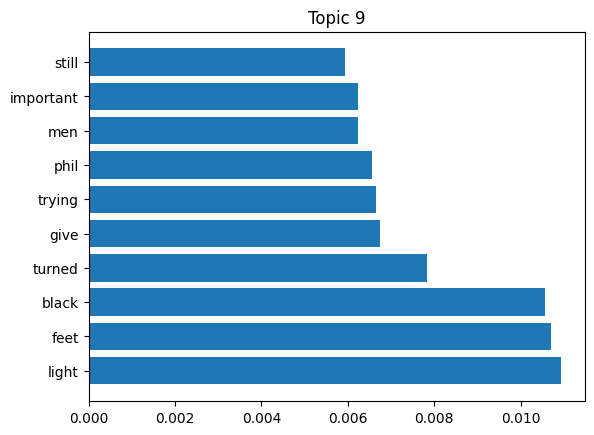

In [1]:
# Primeiro, precisamos instalar algumas bibliotecas necessárias
#!pip install nltk gensim pyLDAvis

# Em seguida, precisamos importar as bibliotecas
import nltk
import gensim
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from imp import reload 

# Vamos começar baixando alguns dados de exemplo do nltk
nltk.download('brown')

# Em seguida, precisamos pré-processar os dados para remover stopwords e outras etapas de pré-processamento
from nltk.corpus import brown
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

stop_words = stopwords.words('english')

def preprocess(text):
  text = ' '.join(text) # junte as palavras em uma string
  text = [word for word in simple_preprocess(text) if word not in stop_words] # remova stopwords
  return text


# Aplique o pré-processamento aos documentos do corpus brown
corpus = [preprocess(doc) for doc in brown.sents()]

# Em seguida, vamos criar um dicionário de palavras a partir do corpus
dictionary = gensim.corpora.Dictionary(corpus)

# Em seguida, vamos criar o corpus em formato bag-of-words
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]

# Agora, podemos treinar o modelo LDA
lda_model = gensim.models.LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes=5)

# Também podemos plotar os tópicos gerados pelo modelo LDA usando matplotlib
topics = lda_model.show_topics(num_words=10, formatted=False)

for topic in topics:
  words = [word[0] for word in topic[1]]
  weights = [word[1] for word in topic[1]]
  plt.figure()
  plt.title('Topic {}'.format(topic[0]))
  plt.barh(words, weights)


In [2]:
# Vamos visualizar os tópicos gerados pelo modelo LDA
from imp import reload 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

vis

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.275276  0.048106       1        1  17.562071
4      0.118683  0.103265       2        1  13.851999
0      0.062130  0.173602       3        1  10.042989
1     -0.145061  0.099272       4        1   9.070508
8     -0.059555  0.068705       5        1   9.027163
9      0.021858 -0.051722       6        1   8.910798
6      0.089884  0.034908       7        1   8.450767
5      0.146377 -0.117220       8        1   7.788922
7      0.154301 -0.062903       9        1   7.709915
3     -0.113340 -0.296014      10        1   7.584868, topic_info=       Term         Freq        Total Category  logprob  loglift
14     said  3487.000000  3487.000000  Default  30.0000  30.0000
661    went  1286.000000  1286.000000  Default  29.0000  29.0000
1356   room   949.000000   949.000000  Default  28.0000  28.0000
3134   eyes   986.000000   986.000000  Default  27.0000  27.0000
375   asked   853.000000   853.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
474      go   354.647380   903.956923  Topic10  -4.7324   1.6434
1489  young   261.192990   529.042915  Topic10  -5.0383   1.8732
2881   look   279.872775   621.567716  Topic10  -4.9692   1.7811
14     said   529.304823  3487.453356  Topic10  -4.3320   0.6937
1703     mr   284.137394   840.023503  Topic10  -4.9541   1.4950

[489 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2182      3  0.225344  across
2182      7  0.199419  across
2182      8  0.482595  across
2182      9  0.091733  across
7260      1  0.015756      af
...     ...       ...     ...
1489      7  0.207923   young
1489      8  0.151216   young
1489      9  0.145546   young
1489     10  0.493344   young
2063      9  0.989685   youth

[762 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 2, 9, 10, 7, 6, 8, 4])